# Numpy 

### Обязательные библиотеки

In [1]:
import sys
from typing import List, Any, Callable, Tuple
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import interpolation as ip

### Общий код

### Задание №1

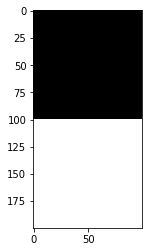

In [2]:
matrix: np.ndarray = np.zeros((100, 100))
matrix = np.vstack((matrix, 255-matrix))
plt.imshow(matrix, cmap='gray')

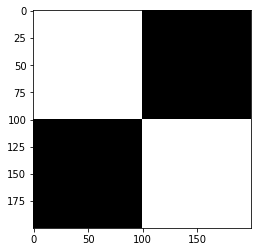

In [3]:
matrix: np.ndarray = np.full((100, 100), 255)
matrix = np.vstack((matrix, 255-matrix))
matrix = np.hstack((matrix, 255-matrix))
plt.imshow(matrix, cmap='gray')

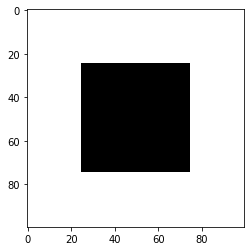

In [4]:
matrix: np.ndarray = np.full((100, 100), 255)
matrix[25:75, 25:75] = 0
plt.imshow(matrix, cmap='gray')

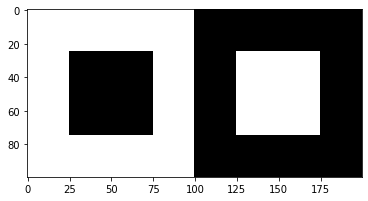

In [5]:
matrix:np.ndarray = np.full((100, 100), 255)
matrix[25:75, 25:75] = 0
matrix = np.hstack((matrix, 255-matrix))
plt.imshow(matrix, cmap='gray')

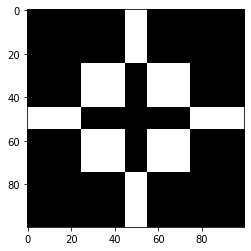

In [6]:
matrix1: np.ndarray = np.full((100, 100), 0)
matrix1[25:75, 25:75] = 255
matrix2: np.ndarray = np.full((100, 100), 255)
matrix2[45:55, :] = 0
matrix2[:, 45:55] = 0
color_converter: Callable[[int, int], int] = lambda x, y: 0 if 0 < (x + y) < 256 else 255 
plt.imshow(np.vectorize(color_converter)(matrix1, matrix2), cmap='gray')

### Задание №2

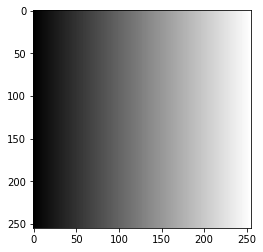

In [7]:
matrix: np.ndarray = np.meshgrid(np.arange(0, 255),np.arange(0, 255))[0]
plt.imshow(matrix, cmap='gray')

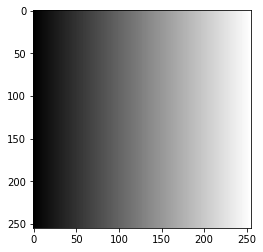

In [8]:
matrix: np.ndarray = np.arange(0, 255)
matrix = np.repeat(matrix, 255).reshape(255, 255).T
plt.imshow(matrix, cmap='gray')

### Задание №3

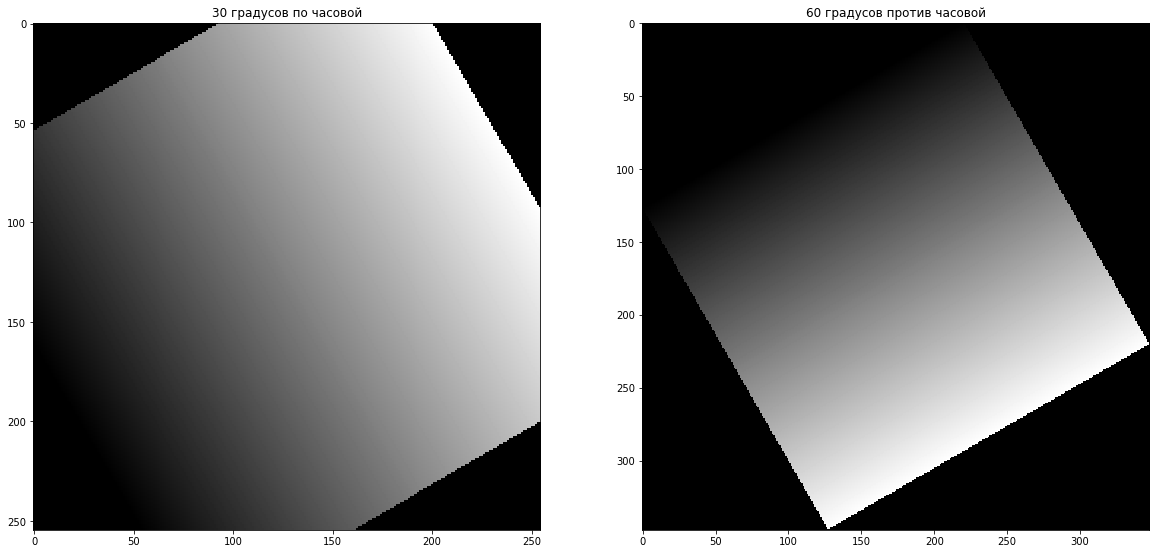

In [9]:
def d_angle(angle: Tuple[int, str, bool]) -> Tuple[int, str]:
    if angle[1] == "l":
        return (angle[0], "по часовой")
    else:
        return (360 - angle[0], "против часовой")

        
angles: List[Tuple[int, str, bool]] = [(30, "l", False), (60, "r", True)]
matrix: np.ndarray = np.meshgrid(np.arange(0, 255),np.arange(0, 255))[0]

ax: Any = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))[1]
index: int 
angle: int
for index, angle in enumerate(angles):
    new_angle: int
    direction: str
    new_angle, direction = d_angle(angle)
    ax[index].set_title(str(angle[0]) + " градусов " + direction)
    ax[index].imshow(ip.rotate(matrix, new_angle, reshape=angle[2]), cmap='gray')

### Задание №4

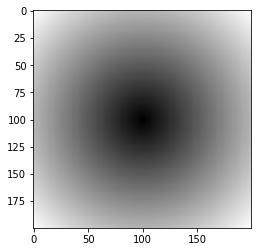

In [10]:
center: Tuple[int, int] = (100, 100)
matrix1: np.ndarray
matrix2: np.ndarray
matrix1, matrix2 = np.meshgrid(np.arange(0, 200), np.arange(0, 200))
rad: Callable[[int, int], float] = lambda x, y: np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
matrix: np.ndarray = np.vectorize(rad)(matrix1, matrix2)
plt.imshow(matrix, cmap='gray')

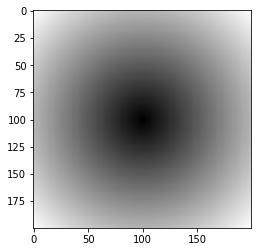

In [11]:
center: Tuple[int, int] = (100, 100)
matrix1: np.ndarray
matrix2: np.ndarray
matrix1, matrix2 = np.meshgrid(np.arange(0, 200), np.arange(0, 200))
matrix: np.ndarray = np.sqrt((matrix1 - center[0]) ** 2 + (matrix2 - center[1]) ** 2)
plt.imshow(matrix, cmap='gray')

### Задание №5

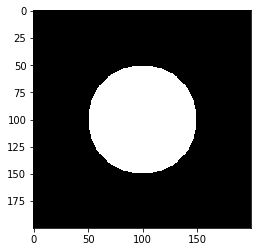

In [12]:
center: Tuple[int, int] = (100, 100)
radius: int = 50
matrix1: np.ndarray
matrix2: np.ndarray
matrix1, matrix2 = np.meshgrid(np.arange(0, 200), np.arange(0, 200))
rad: Callable[[int, int], int] = lambda x, y: 1 if np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2) < radius else 0
matrix: np.ndarray = np.vectorize(rad)(matrix1, matrix2)
plt.imshow(matrix, cmap='gray')

### Задание №6

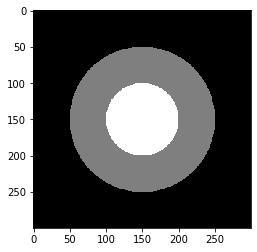

In [13]:
center: Tuple[int, int] = (150, 150)


def rad(x: int, y: int, radius: int) -> bool:
    return True if np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2) < radius else False


def rad_counter(x: int, y: int, radiuses: Tuple[int, int]) -> int:
    if rad(x, y, radiuses[0]):
        return 255
    elif rad(x, y, radiuses[1]):
        return 127
    else:
        return 0

    
radiuses: Tuple[int, int] = (50, 100)
matrix1: np.ndarray
matrix2: np.ndarray
matrix1, matrix2 = np.meshgrid(np.arange(0, 300), np.arange(0, 300))
radius: Callable[[int, int], int] = lambda x, y: rad_counter(x, y, radiuses)
matrix: np.ndarray = np.vectorize(radius)(matrix1, matrix2)
plt.imshow(matrix, cmap='gray')

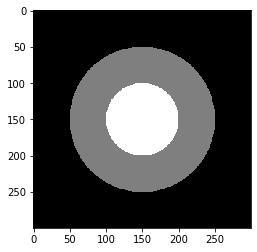

In [14]:
np.set_printoptions(threshold=sys.maxsize)
center: Tuple[int, int] = (150, 150)
radiuses: Tuple[int, int] = (50, 100)
matrix1: np.ndarray
matrix2: np.ndarray
matrix1, matrix2 = np.meshgrid(np.arange(0, 300), np.arange(0, 300))
D: np.ndarray = np.sqrt((matrix1 - center[0]) ** 2 + (matrix2 - center[1]) ** 2)
matrix: np.ndarray = (D < radiuses[0]) * 255 + (D >= radiuses[0]) * (D < radiuses[1]) * 127
plt.imshow(matrix, cmap='gray')